# Coursework 

In [1]:
#========Import required libraries==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
import cv2 as cv
import os 
import sys
from numpy import asarray




#==========this libraries for the models =============
#========== Gridshearch library used for tunning the hyper-parameters====
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#========== This libraries for getting the result of accurcy and confusion matrix of the model =======
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score, jaccard_score
from sklearn.metrics import accuracy_score

#======================= Avoiding warnings messages===============
import warnings
warnings.filterwarnings('ignore')

#============== Splitting the data into training and validation =========
from sklearn.model_selection import train_test_split


#============= This library used for saved the model =================
import pickle


# Reading the data form the file 

In [6]:
# ===============================path of the data========================= 
path="/Users/samaheralghanmi/Documents/GitHub/ML_Coursework/dataset/"

#=====================================read the csv file that contian the images name and its label
train=pd.read_csv(path+ '/label.csv')
#store the images name in (image_name )
image_name=train['file_name'].to_list()

#store the labels of the images in (label_name ), which tell us the type of tumors 

label_name=train['label'].to_list()


train_labels = [] 

#len(label_name)--> number of the data set that we have 
#this for loop will check on all the labal name list 
#and it will seprate the data into two class 0 and 1
#0 means (no_tumor), 1 means (have tumor) this will store in train_labels 

for i in range(len(label_name)):
    if label_name[i] == 'no_tumor':
        train_labels.append(0)
    else:
        train_labels.append(1)

#Print an examples for the two classes   

 
 
        
print("this image is", image_name[0] , label_name[0], "in Class: ", train_labels[0])
print("this image is", image_name[1] , label_name[1], "in Class: ", train_labels[1])

this image is IMAGE_0000.jpg meningioma_tumor in Class:  1
this image is IMAGE_0001.jpg no_tumor in Class:  0


this image is IMAGE_0002.jpg meningioma_tumor in Class:  1


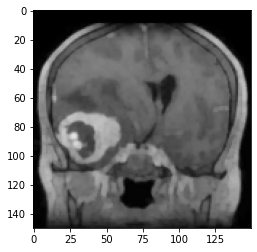

In [3]:

train_img = [] # X trian 
img_size= 150 # for using in image resize  

# =========== Reading the preproccing images and resize it then convert it to an array ======
# =========== change the file path as its apear in your computer ================
for i in range(len(image_name)):
    train_img.append(np.array(cv.resize(cv.imread(path+"/New_images/"+image_name[i]),(img_size,img_size))))




#Example of one image after resizing 
print("this image is", image_name[2] , label_name[2], "in Class: ", train_labels[2])
plt.imshow(train_img[2])




In [8]:
# here we can see how many data set in each class 
np.unique(train_labels)
pd.Series(train_labels).value_counts()


1    2546
0     454
dtype: int64

# Data Visualization

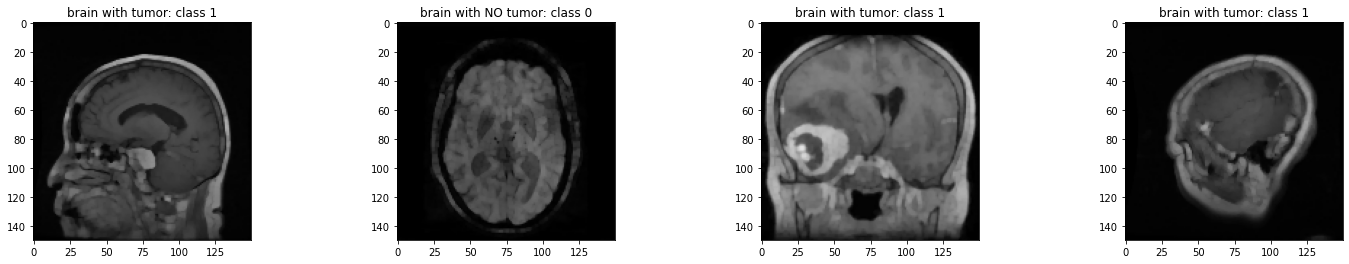

In [13]:
#============== This funcion used for plotting the images from each class=============

def Data_Visualization():
    c =0

    fig, subplots = plt.subplots(1, 4)
    fig.set_size_inches(25, 4)
    for j in range(len(train_labels)):
        if(c<4):
            if train_labels[j] == 0:
                subplots[j].imshow(train_img[j], cmap="gray")
                subplots[j].set_title("brain with NO tumor: class 0")
            elif train_labels[j] == 1:
                subplots[j].imshow(train_img[j], cmap="gray")
                subplots[j].set_title("brain with tumor: class 1")
        c=c+1


    return plt.show()

#=============== Plotting the images ==================
Data_Visualization()

# Split the data 

In [4]:
# ================== reshape the images list ===============
train_img = np.array(train_img).reshape(3000, -1)

# ================== Split the data ======================= 
X_train,X_t,y_train,y_t=train_test_split(train_img,train_labels,test_size=0.20,random_state=42) 
print (len(X_t), len(y_t), len(X_train), len(y_train))
print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(train_img)),3),round((len(y_t)*1.0)/len(train_img),3)))

600 600 2400 2400
train set: 0.8  | test set: 0.2


In [5]:
# ============================= check on the data shape ===========================
X_train.shape

(2400, 67500)

# Normalize the data

In [17]:
#================= convert from integers to floats================
X_train = X_train.astype('float32')
# ======================normalize to the range 0-1===================
X_train /= 255.0
#================= convert from integers to floats================
X_t = X_t.astype('float32')
# ==================normalize to the range 0-1=============
X_t /= 255.0

print('Test', X_t.min(), X_t.max(), X_t.mean(), X_t.std())
print('Train', X_train.min(), X_train.max(), X_train.mean(), X_train.std())

Test 0.0 1.0 0.17323357 0.17916355
Train 0.0 1.0 0.17704211 0.18300748


# Fiting and train the model (SVM)

In [19]:
# ================Search for the best Hyper-parameter value used search grid ========================
param_grid = {'C': [0.1, 1, 10, 100, 1000, 10000],
              'gamma': [0.00001, 0.0001, 0.001, 0.01],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 2)
 
#======================== fitting the model for grid search========================
grid.fit(X_train, y_train)

#======================== print best parameter after tuning========================
print(grid.best_params_)
 
#======================== print how our model looks after hyper-parameter tuning================
print(grid.best_estimator_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time= 1.3min
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time= 1.3min
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time= 1.3min
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time= 1.2min
[CV] END .....................C=0.1, gamma=1e-05, kernel=rbf; total time=  59.1s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=  59.5s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=  58.5s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time= 1.0min
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=  59.8s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=  57.3s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time= 1.3min
[CV] END .....................C=0.1, gamma=0.00

[CV] END ...................C=10000, gamma=1e-05, kernel=rbf; total time=  48.1s
[CV] END ...................C=10000, gamma=1e-05, kernel=rbf; total time=  48.2s
[CV] END ...................C=10000, gamma=1e-05, kernel=rbf; total time=  48.7s
[CV] END ...................C=10000, gamma=1e-05, kernel=rbf; total time=  49.0s
[CV] END ..................C=10000, gamma=0.0001, kernel=rbf; total time=  48.6s
[CV] END ..................C=10000, gamma=0.0001, kernel=rbf; total time=  51.5s
[CV] END ..................C=10000, gamma=0.0001, kernel=rbf; total time=  49.9s
[CV] END ..................C=10000, gamma=0.0001, kernel=rbf; total time=  49.1s
[CV] END ..................C=10000, gamma=0.0001, kernel=rbf; total time=  49.3s
[CV] END ...................C=10000, gamma=0.001, kernel=rbf; total time= 1.6min
[CV] END ...................C=10000, gamma=0.001, kernel=rbf; total time= 1.3min
[CV] END ...................C=10000, gamma=0.001, kernel=rbf; total time= 1.3min
[CV] END ...................

In [ ]:
#====================== Result of search Grid=========================

#{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
#SVC(C=100, gamma=0.0001)

In [35]:
#=================== Make predictions ===============================
pred_y = grid.predict(X_t)
#=================== print classification report=====================
print(classification_report(y_t, pred_y))

pp= grid.predict(X_train)
print(classification_report(y_train, pp))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79        92
           1       0.95      0.99      0.97       508

    accuracy                           0.94       600
   macro avg       0.93      0.85      0.88       600
weighted avg       0.94      0.94      0.94       600

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       362
           1       1.00      1.00      1.00      2038

    accuracy                           1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400



In [21]:
#=================== this code for printing the result ====================
# ====================precision    recall  f1-score==================
y_t = np.asarray (y_t)
y_train = np.asarray (y_train)
y_true=np.argmax(y_t)
cm = confusion_matrix(y_t, pred_y)
#print (cm)

#===========================printing the Classificarion Report================ 
print(classification_report(y_t, pred_y))

precision = precision_score(y_t, pred_y, average='weighted')
print('Precision: %f' % precision)

# =============================recall: tp / (tp + fn)==========================
recall = recall_score(y_t, pred_y, average='weighted')
print('Recall: %f' % recall)
# =============================f1: tp / (tp + fp + fn)==========================
f1 = f1_score(y_t, pred_y, average='weighted')
print('F1 score: %f' % f1)
#==============================IoU=========================================
print ('IoU:', jaccard_score(y_t, pred_y, average='micro'))
#========================== Print Accurecy for Validation and training ===========
y_pred= grid.predict(X_t)
print("Validation_test:",accuracy_score(y_t, y_pred))
#====
y_pred1= grid.predict(X_train)
print("Accuracy_train:",accuracy_score(y_train, y_pred1))
#=====

              precision    recall  f1-score   support

           0       0.90      0.71      0.79        92
           1       0.95      0.99      0.97       508

    accuracy                           0.94       600
   macro avg       0.93      0.85      0.88       600
weighted avg       0.94      0.94      0.94       600

Precision: 0.941797
Recall: 0.943333
F1 score: 0.940425
IoU: 0.8927444794952681
Accuracy_test: 0.9433333333333334
Accuracy_train: 1.0


In [22]:
# ==================Now, this code will print the confusion matrix of our results
#=================== with normlization, and without normilazation 
class_names = ['No Tumor', 'Tumor']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without Normalization'

    # =========================Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # =========================Only use the labels that appear in the data
    #==========================classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without Normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # ===========================We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    #=========================== Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # =========================Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion Matrix, without Normalization


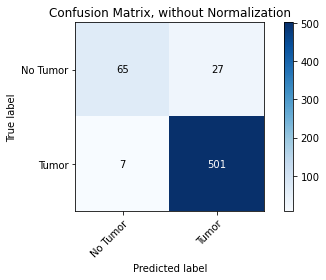

Normalized Confusion Matrix


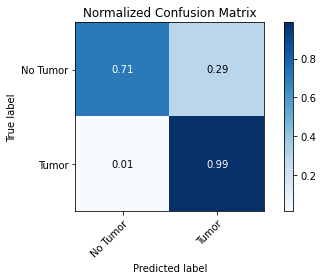

In [23]:
#======Print the matrix============

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 14}

np.set_printoptions(precision=2)

#===================== Plot non-normalized confusion matrix
plot_confusion_matrix(y_t, pred_y, classes=class_names,
                      title='Confusion Matrix, without Normalization')
plt.savefig('confusion matrix22'+'Brain Tumor1'+'.png')
plt.show()

# =====================Plot normalized confusion matrix
plot_confusion_matrix(y_t, pred_y, classes=class_names, normalize=True,
                      title='Normalized Confusion Matrix')
plt.savefig('Confusion Matrix'+'RF' +'.png')
plt.show()

In [40]:
#====== Save the model===== 

filename = 'SVM_model_Task1.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))